# Overview


In [1]:
import pandas as pd

basepath = "/project/pi_hongyu_umass_edu/zonghai/clinical-llm-alignment/durga_sandeep/icl-on-VLMs/flamingo/classification/stanford_cars"

df_zero = pd.read_pickle(f"{basepath}/random_2_shot.pickle")
print(df_zero.shape)
df_zero.head(2)

(1000, 6)


,index,target_label,pick_n_files_names,few_shot_query,raw_responses,predicted_label
0,0,Dodge Caliber Wagon 2012,[/scratch/workspace/dsaluru_umass_edu-email/st...,<image>\nQuestion: Identify and classify the c...,Dodge Journey 2012 |<endofchunk>|\n\n Questio...,Dodge Journey 2012
1,1,Dodge Caliber Wagon 2012,[/scratch/workspace/dsaluru_umass_edu-email/st...,<image>\nQuestion: Identify and classify the c...,Chrysler 300C Coupe 2008 |<endofchunk>|<|endo...,Chrysler 300C Coupe 2008


In [2]:
df_two = pd.read_pickle(f"{basepath}/random_2_shot.pickle")
df_two['predicted_label'] = df_two['raw_responses'].apply(lambda x: x.split(" |")[0][1:])
df_two['bool'] = df_two.apply(lambda x: 1 if (x['predicted_label'] == x['target_label']) else 0, 1)
df_two.head(3)

,index,target_label,pick_n_files_names,few_shot_query,raw_responses,predicted_label,bool
0,0,Dodge Caliber Wagon 2012,[/scratch/workspace/dsaluru_umass_edu-email/st...,<image>\nQuestion: Identify and classify the c...,Dodge Journey 2012 |<endofchunk>|\n\n Questio...,Dodge Journey 2012,0
1,1,Dodge Caliber Wagon 2012,[/scratch/workspace/dsaluru_umass_edu-email/st...,<image>\nQuestion: Identify and classify the c...,Chrysler 300C Coupe 2008 |<endofchunk>|<|endo...,Chrysler 300C Coupe 2008,0
2,2,Dodge Caliber Wagon 2012,[/scratch/workspace/dsaluru_umass_edu-email/st...,<image>\nQuestion: Identify and classify the c...,Dodge Journey 2010 |<endofchunk>|\n\n Questio...,Dodge Journey 2010,0


In [3]:
acc = df_two[df_two.apply(lambda x: 1 if (x['predicted_label'] == x['target_label']) else 0, 1) == 1].shape[0]/len(df_two)
acc

0.05

In [4]:
df_rice_two = pd.read_pickle(f"{basepath}/rice_two_shot.pickle")
df_rice_two['predicted_label'] = df_rice_two['raw_responses'].apply(lambda x: x.split(" |")[0][1:])
df_rice_two['bool'] = df_rice_two.apply(lambda x: 1 if (x['predicted_label'] == x['target_label']) else 0, 1)
df_rice_two.head(3)

,index,target_label,pick_n_files_names,few_shot_query,raw_responses,predicted_label,bool
0,0,Dodge Caliber Wagon 2012,[/scratch/workspace/dsaluru_umass_edu-email/st...,<image>\nQuestion: Identify and classify the c...,Dodge Journey SUV 2012 |<endofchunk>|<|endofc...,Dodge Journey SUV 2012,0
1,1,Dodge Caliber Wagon 2012,[/scratch/workspace/dsaluru_umass_edu-email/st...,<image>\nQuestion: Identify and classify the c...,Chevrolet Equinox SUV 2012 |<endofchunk>|<|en...,Chevrolet Equinox SUV 2012,0
2,2,Dodge Caliber Wagon 2012,[/scratch/workspace/dsaluru_umass_edu-email/st...,<image>\nQuestion: Identify and classify the c...,Dodge Journey SUV 2012 |<endofchunk>|\n\n Que...,Dodge Journey SUV 2012,0


In [5]:
df_rice_two[df_rice_two.apply(lambda x: 1 if (x['predicted_label'] == x['target_label']) else 0, 1) == 1].shape[0]/len(df_rice_two)

0.09

In [6]:
df_two[(df_rice_two['bool'] == 1) & (df_two['bool'] == 1)].shape[0]/len(df_two)

0.026

In [7]:
df_two[(df_rice_two['bool'] == 1) & (df_two['bool'] == 0)].shape[0]/len(df_two)

0.064

In [8]:
df_two[(df_rice_two['bool'] == 1) & (df_two['bool'] == 0)].head()

,index,target_label,pick_n_files_names,few_shot_query,raw_responses,predicted_label,bool
21,21,Buick Enclave SUV 2012,[/scratch/workspace/dsaluru_umass_edu-email/st...,<image>\nQuestion: Identify and classify the c...,Buick Enclave SUV 2011 |<endofchunk>|\n\n,Buick Enclave SUV 2011,0
24,24,Buick Enclave SUV 2012,[/scratch/workspace/dsaluru_umass_edu-email/st...,<image>\nQuestion: Identify and classify the c...,Buick Enclave 2008 |<endofchunk>|<|endofchunk|>,Buick Enclave 2008,0
25,25,Buick Enclave SUV 2012,[/scratch/workspace/dsaluru_umass_edu-email/st...,<image>\nQuestion: Identify and classify the c...,Buick Enclave SUV 2011 |<endofchunk>|<|endofc...,Buick Enclave SUV 2011,0
27,27,Buick Enclave SUV 2012,[/scratch/workspace/dsaluru_umass_edu-email/st...,<image>\nQuestion: Identify and classify the c...,Buick Enclave 2008 |<endofchunk>|<|endofchunk|>,Buick Enclave 2008,0
28,28,Buick Enclave SUV 2012,[/scratch/workspace/dsaluru_umass_edu-email/st...,<image>\nQuestion: Identify and classify the c...,Buick Enclave SUV 2011 |<endofchunk>|\n\n,Buick Enclave SUV 2011,0


In [9]:
df_two['diff_bool'] = df_rice_two['bool'].tolist()
df_two['diff_label'] = df_rice_two['predicted_label'].tolist()

In [10]:
with open("/project/pi_hongyu_umass_edu/zonghai/clinical-llm-alignment/durga_sandeep/icl-on-VLMs/flamingo/classification/imagenet/LOC_synset_mapping.txt", 'r') as f:
    mapping = f.readlines()
file_to_label_dict = {x.split(" ")[0] : (" ".join(x.replace("\n", "").lower().split(" ")[1:])).split(", ") for x in mapping}

In [11]:
import matplotlib.pyplot as plt
from PIL import Image

def plot_image(image_path, label):
    # Open the image
    image = Image.open(image_path)

    # Display the image
    plt.title(label)
    plt.imshow(image)
    plt.axis('off')  # Turn off axis labels
    plt.show()

In [12]:
df = pd.read_excel("/project/pi_hongyu_umass_edu/zonghai/clinical-llm-alignment/durga_sandeep/icl-on-VLMs/flamingo/classification/stanford_cars/stanford_cars_with_class_names.xlsx")
df.head()

,Unnamed: 0,x1,y1,x2,y2,class,ture_class_name,image
0,0,39,116,569,375,14,Audi TTS Coupe 2012,00001.jpg
1,1,36,116,868,587,3,Acura TL Sedan 2012,00002.jpg
2,2,85,109,601,381,91,Dodge Dakota Club Cab 2007,00003.jpg
3,3,621,393,1484,1096,134,Hyundai Sonata Hybrid Sedan 2012,00004.jpg
4,4,14,36,133,99,106,Ford F-450 Super Duty Crew Cab 2012,00005.jpg


In [13]:
df[df['image'] == '00135.jpg']

,Unnamed: 0,x1,y1,x2,y2,class,ture_class_name,image
134,134,19,735,2669,2192,58,Chevrolet Traverse SUV 2012,00135.jpg


In [14]:
index = 24

In [15]:
df_rice_two.iloc[index]['pick_n_files_names']

['/scratch/workspace/dsaluru_umass_edu-email/stanford_cars/stanford_cars/cars_train/cars_train/00135.jpg',
 '/scratch/workspace/dsaluru_umass_edu-email/stanford_cars/stanford_cars/cars_train/cars_train/01242.jpg']

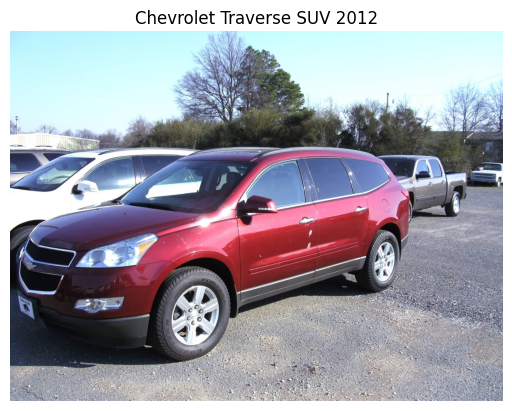

In [ ]:
filename = df_rice_two.iloc[index]['pick_n_files_names'][0]
plot_image(filename, df[df['image'] == filename.split("/")[-1]].iloc[0]['ture_class_name'])

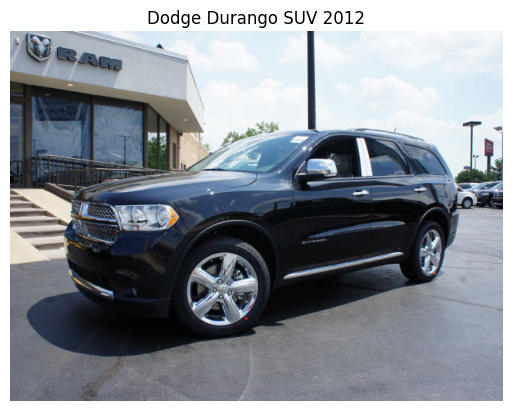

In [ ]:
filename = df_rice_two.iloc[index]['pick_n_files_names'][1]
plot_image(filename, df[df['image'] == filename.split("/")[-1]].iloc[0]['ture_class_name'])

In [17]:
test_data = pd.read_pickle("/project/pi_hongyu_umass_edu/zonghai/clinical-llm-alignment/durga_sandeep/icl-on-VLMs/flamingo/classification/stanford_cars/stanford_cars_test_data_1k_samples.pickle")
print(test_data.shape)
test_data.head(3)

(1000, 4)


,image,class,true_class_name,image_path
2478,02479.jpg,83,Dodge Caliber Wagon 2012,/scratch/workspace/dsaluru_umass_edu-email/sta...
7215,07216.jpg,83,Dodge Caliber Wagon 2012,/scratch/workspace/dsaluru_umass_edu-email/sta...
3898,03899.jpg,83,Dodge Caliber Wagon 2012,/scratch/workspace/dsaluru_umass_edu-email/sta...


Random prediction :  Buick Enclave 2008
Rice prediction :  Buick Enclave SUV 2012


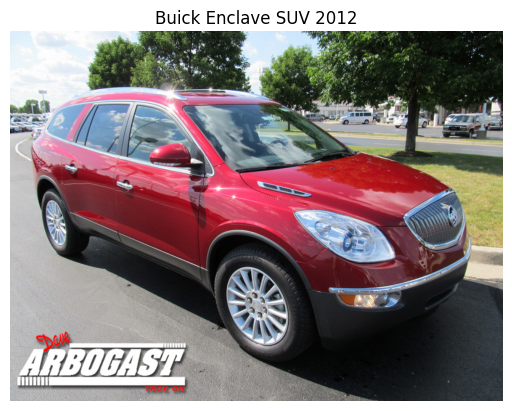

In [ ]:
sample = test_data.iloc[index]
filename = sample['image_path']
print("Random prediction : " , df_two.iloc[index]['predicted_label'])
print("Rice prediction : " , df_two.iloc[index]['diff_label'])
plot_image(filename, df_two.iloc[index]['diff_label'])

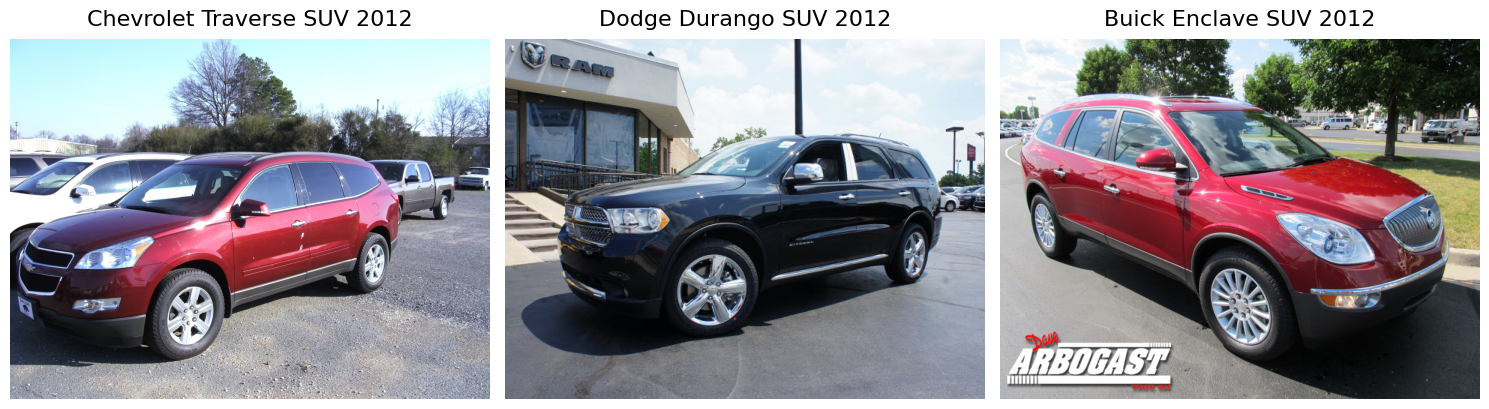

In [51]:
import matplotlib.pyplot as plt
from PIL import Image

filename1 = df_rice_two.iloc[index]['pick_n_files_names'][0]
label1 = df[df['image'] == filename1.split("/")[-1]].iloc[0]['ture_class_name']

filename2 = df_rice_two.iloc[index]['pick_n_files_names'][1]
label2 = df[df['image'] == filename2.split("/")[-1]].iloc[0]['ture_class_name']

sample = test_data.iloc[index]
filename3 = sample['image_path']
label3 = df_two.iloc[index]['diff_label']

# Define the paths to the images and the corresponding labels
image_paths = [
    filename1,
    filename2,
    filename3
]

labels = [
    label1,
    label2,
    label3
]

# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Loop through the images and their labels
for i in range(3):
    image = Image.open(image_paths[i])
    axes[i].imshow(image)
    axes[i].axis('off')  # Turn off axis

    # Set the label below the image using figtext for better control over font size and placement
    axes[i].set_title(labels[i], fontsize=16, pad=10)  # Set font size and padding for the label

# Adjust layout to ensure the images and labels do not overlap
plt.tight_layout()
plt.show()

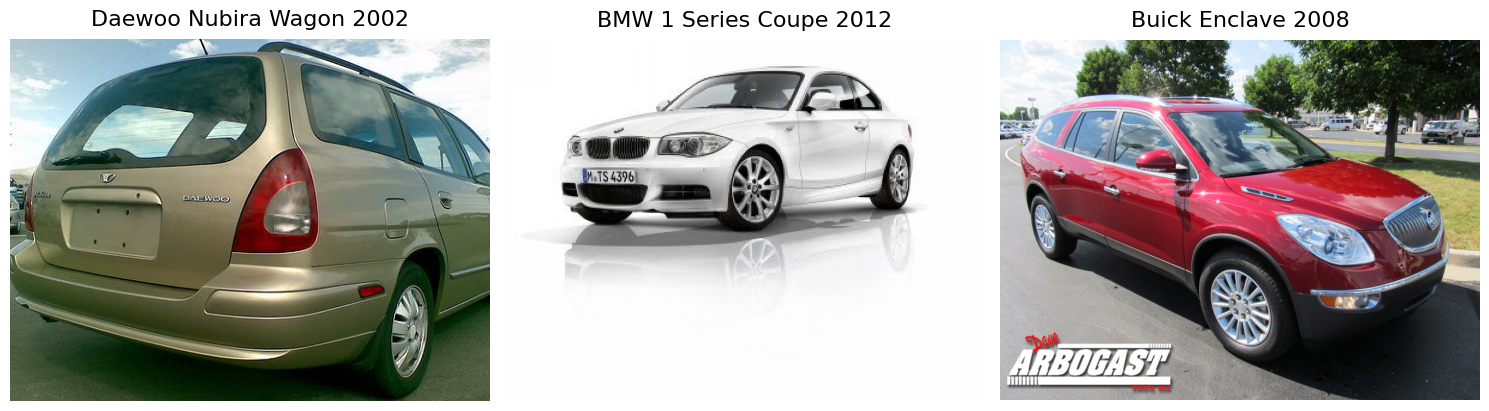

In [19]:
import matplotlib.pyplot as plt
from PIL import Image

filename1 = df_two.iloc[index]['pick_n_files_names'][0]
label1 = df[df['image'] == filename1.split("/")[-1]].iloc[0]['ture_class_name']

filename2 = df_two.iloc[index]['pick_n_files_names'][1]
label2 = df[df['image'] == filename2.split("/")[-1]].iloc[0]['ture_class_name']

sample = test_data.iloc[index]
filename3 = sample['image_path']
label3 = df_two.iloc[index]['predicted_label']

# Define the paths to the images and the corresponding labels
image_paths = [
    filename1,
    filename2,
    filename3
]

labels = [
    label1,
    label2,
    label3
]

# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Loop through the images and their labels
for i in range(3):
    image = Image.open(image_paths[i])
    axes[i].imshow(image)
    axes[i].axis('off')  # Turn off axis

    # Set the label below the image using figtext for better control over font size and placement
    axes[i].set_title(labels[i], fontsize=16, pad=10)  # Set font size and padding for the label

# Adjust layout to ensure the images and labels do not overlap
plt.tight_layout()
plt.savefig("random_two_shot_stanford.png")
plt.show()

In [55]:
df_two[(df_two['diff_bool'] == 1) & (df_two['bool'] == 0)][['filename', 'target_label', 'predicted_label', 'diff_label']].head(10)

,filename,target_label,predicted_label,diff_label
2,ILSVRC2012_val_00010027.JPEG,[minibus],van,minibus
48,ILSVRC2012_val_00025876.JPEG,"[tabby, tabby cat]",cat,tabby cat
89,ILSVRC2012_val_00003512.JPEG,"[radio, wireless]",tube radio,radio
95,ILSVRC2012_val_00022858.JPEG,"[wallaby, brush kangaroo]",kangaroo,wallaby
97,ILSVRC2012_val_00002230.JPEG,"[wallaby, brush kangaroo]",antelope,wallaby
133,ILSVRC2012_val_00008540.JPEG,"[flute, transverse flute]",music,flute
136,ILSVRC2012_val_00044942.JPEG,"[flute, transverse flute]",band,flute
139,ILSVRC2012_val_00013749.JPEG,"[flute, transverse flute]",guitar,flute
250,ILSVRC2012_val_00031486.JPEG,[golf ball],masonic,golf ball
252,ILSVRC2012_val_00006468.JPEG,[golf ball],golf,golf ball


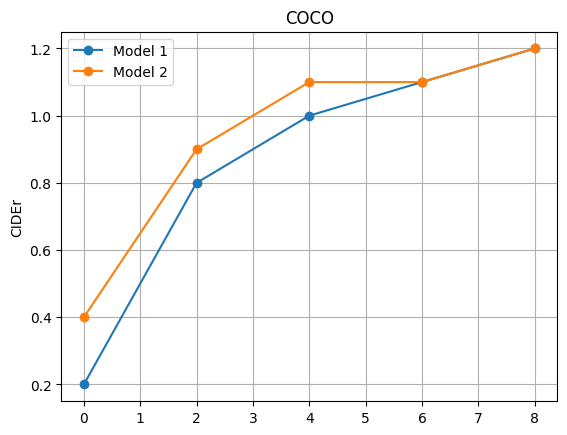

In [ ]:
import matplotlib.pyplot as plt

# Sample data (replace with your actual x and y values)
x = [0, 2, 4, 8]
y1 = [5.7, 19.8, 20.1, 20.8]
y2 = [5.7, 22.5, 24.2, 25.4]

# Plot each line
plt.plot(x, y1, 'o-', label='Random')  # Line with markers
plt.plot(x, y2, 'o-', label='RICE')
# Title and labels
plt.title("Imagenet (sample)")
plt.ylabel("Accuracy")
plt.xlabel("n-shot")  # No label for x-axis

# Add legend
plt.legend()

# Show grid
plt.grid(True)

# Display the plot
plt.show()

### Additional Metrics

### Imagenet

In [1]:
def calculate_char_metrics(reference, candidate):
    """
    Calculate character-level 1-gram precision, recall, and F-score between two strings.
    
    Args:
        reference (str): The reference string
        candidate (str): The candidate string to compare against reference
        
    Returns:
        tuple: (precision, recall, f_score)
    """
    # Convert strings to sets of characters
    ref_chars = set(reference.lower())
    cand_chars = set(candidate.lower())
    
    # Calculate matches (true positives)
    matches = len(ref_chars.intersection(cand_chars))
    
    # Calculate precision, recall, and F-score
    precision = matches / len(cand_chars) if len(cand_chars) > 0 else 0
    recall = matches / len(ref_chars) if len(ref_chars) > 0 else 0
    f_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    return precision, recall, f_score

In [ ]:
# random
# 0 - 0.632115	0.516243	0.536250
# 2 - 0.632115	0.516243	0.536250
# 4 - 0.631716	0.514619	0.534216
# 8 - 0.640989	0.520102	0.542592

# rice
# 0 - 0.632115	0.516243	0.536250
# 2 - 0.648231	0.558367	0.570420
# 4 - 0.656760	0.569920	0.582235
# 8 - 0.664890	0.582565	0.593224

In [19]:
import pandas as pd

basepath = "/project/pi_hongyu_umass_edu/zonghai/clinical-llm-alignment/durga_sandeep/icl-on-VLMs/flamingo/classification/performance/data"

df_zero = pd.read_pickle(f"{basepath}/imagenet_sample_test_dataset_1k_with_rice_eight_shot_prompt.pickle")
df_zero['predicted_label'] = df_zero['raw_responses'].apply(lambda x: x.split(" |")[0][1:])
print(df_zero.shape)
df_zero.head(2)

(1000, 7)


,folder,target_label,filename,pick_n_files_names,few_shot_query,raw_responses,predicted_label
0,n03769881,[minibus],ILSVRC2012_val_00033143.JPEG,[/scratch/workspace/dsaluru_umass_edu-email/im...,<image>\nQuestion: Classify the image into one...,school bus |<endofchunk>|\n\n,school bus
1,n03769881,[minibus],ILSVRC2012_val_00049177.JPEG,[/scratch/workspace/dsaluru_umass_edu-email/im...,<image>\nQuestion: Classify the image into one...,school bus |<endofchunk>|\n\n,school bus


In [20]:
df_zero['1gram_metrics'] = df_zero.apply(lambda x: calculate_char_metrics(x['target_label'][0], x['predicted_label']), 1)
df_zero['precision'] = df_zero['1gram_metrics'].apply(lambda x: x[0])
df_zero['recall'] = df_zero['1gram_metrics'].apply(lambda x: x[1])
df_zero['f1_score'] = df_zero['1gram_metrics'].apply(lambda x: x[2])

In [21]:
df_zero[['precision', 'recall', 'f1_score']].describe()

,precision,recall,f1_score
count,1000.000000,1000.000000,1000.000000
mean,0.664890,0.582565,0.593224
std,0.324169,0.308339,0.292119
min,0.000000,0.000000,0.000000
25%,0.400000,0.333333,0.363636
50%,0.666667,0.500000,0.571429
75%,1.000000,1.000000,0.857143
max,1.000000,1.000000,1.000000


### Stanford Cars

In [1]:
def calculate_1gram_metrics(reference, candidate):
    """
    Calculate 1-gram precision, recall, and F-score between two strings.
    
    Args:
        reference (str): The reference string
        candidate (str): The candidate string to compare against reference
        
    Returns:
        tuple: (precision, recall, f_score)
    """
    # Convert strings to sets of words
    ref_words = set(reference.lower().split())
    cand_words = set(candidate.lower().split())
    
    # Calculate matches (true positives)
    matches = len(ref_words.intersection(cand_words))
    
    # Calculate precision, recall, and F-score
    precision = matches / len(cand_words) if len(cand_words) > 0 else 0
    recall = matches / len(ref_words) if len(ref_words) > 0 else 0
    f_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    return precision, recall, f_score

In [ ]:
# random
# 0 - 0.632583	0.353790	0.447655
# 2 - 0.53961	0.468117	0.495181
# 4 - 0.515293	0.495148	0.502265
# 8 - 0.517217	0.506748	0.509856

# rice
# 0 - 0.632583	0.353790	0.447655
# 2 - 0.567043	0.529955	0.544088
# 4 - 0.555402	0.543240	0.546785
# 8 - 0.564202	0.556533	0.558000

In [44]:
import pandas as pd

basepath = "/project/pi_hongyu_umass_edu/zonghai/clinical-llm-alignment/durga_sandeep/icl-on-VLMs/flamingo/classification/stanford_cars"

df_zero = pd.read_pickle(f"{basepath}/rice_eight_shot.pickle")
print(df_zero.shape)
df_zero.head(2)

(1000, 6)


,index,target_label,pick_n_files_names,few_shot_query,raw_responses,predicted_label
0,0,Dodge Caliber Wagon 2012,[/scratch/workspace/dsaluru_umass_edu-email/st...,<image>\nQuestion: Identify and classify the c...,Dodge Journey SUV 2011 |<endofchunk>|\n\n Que...,Dodge Journey SUV 2011
1,1,Dodge Caliber Wagon 2012,[/scratch/workspace/dsaluru_umass_edu-email/st...,<image>\nQuestion: Identify and classify the c...,GMC Acadia SUV 2012 |<endofchunk>|\n\n Question,GMC Acadia SUV 2012


In [ ]:
# df_zero['predicted_label'] = df_zero['raw_responses'].apply(lambda x: " ".join(x.split(".")[0][1:].split("is a ")[1:]))

In [45]:
df_zero['1gram_metrics'] = df_zero.apply(lambda x: calculate_1gram_metrics(x['target_label'], x['predicted_label']), 1)

In [46]:
df_zero['precision'] = df_zero['1gram_metrics'].apply(lambda x: x[0])
df_zero['recall'] = df_zero['1gram_metrics'].apply(lambda x: x[1])
df_zero['f1_score'] = df_zero['1gram_metrics'].apply(lambda x: x[2])

In [47]:
df_zero[['precision', 'recall', 'f1_score']].describe()

,precision,recall,f1_score
count,1000.000000,1000.000000,1000.000000
mean,0.564202,0.556533,0.558000
std,0.283257,0.276740,0.277323
min,0.000000,0.000000,0.000000
25%,0.285714,0.333333,0.333333
50%,0.600000,0.571429,0.600000
75%,0.750000,0.750000,0.750000
max,1.000000,1.000000,1.000000


In [13]:
df_zero[['target_label', 'predicted_label', '1gram_metrics']]

,target_label,predicted_label,1gram_metrics
0,Dodge Caliber Wagon 2012,white Dodge Caliber,"(0.6666666666666666, 0.5, 0.5714285714285715)"
1,Dodge Caliber Wagon 2012,2010 Dodge Caliber,"(0.6666666666666666, 0.5, 0.5714285714285715)"
2,Dodge Caliber Wagon 2012,2010 Dodge Journey,"(0.3333333333333333, 0.25, 0.28571428571428575)"
3,Dodge Caliber Wagon 2012,Dodge Caliber,"(1.0, 0.5, 0.6666666666666666)"
4,Dodge Caliber Wagon 2012,2007 Dodge Caliber,"(0.6666666666666666, 0.5, 0.5714285714285715)"
...,...,...,...
995,Hyundai Elantra Sedan 2007,Nissan Altima,"(0.0, 0.0, 0)"
996,Hyundai Elantra Sedan 2007,2010 Hyundai Sonata,"(0.3333333333333333, 0.25, 0.28571428571428575)"
997,Hyundai Elantra Sedan 2007,Toyota Corolla,"(0.0, 0.0, 0)"
998,Hyundai Elantra Sedan 2007,Nissan Altima,"(0.0, 0.0, 0)"


In [ ]:
df_two['predicted_label'] = df_zero['raw_responses'].apply(lambda x: x.split(" |")[0][1:])
df_two['bool'] = df_two.apply(lambda x: 1 if (x['predicted_label'] == x['target_label']) else 0, 1)
df_two.head(3)

In [8]:
df_zero['raw_responses'].apply(lambda x: " ".join(x.split(".")[0][1:].split("is a ")[1:]))

0      white Dodge Caliber
1       2010 Dodge Caliber
2       2010 Dodge Journey
3            Dodge Caliber
4       2007 Dodge Caliber
              ...         
995          Nissan Altima
996    2010 Hyundai Sonata
997         Toyota Corolla
998          Nissan Altima
999     2006 Nissan Altima
Name: raw_responses, Length: 1000, dtype: object